In [1]:
import numpy as np
from interface import *


#Read the bispectrum triangles and measured data-vector
inp_dv = np.load('./input_data/quijote_dvs.npz')
tr0 = inp_dv['quij_tr0']
tr020 = inp_dv['quij_tr020']
mean = inp_dv['quij_meanz05']
bk_sn = inp_dv['quij_snz05']

#Load the PTcool template for the power spectrum, in this case the Nseries fiducial one
P_template = np.loadtxt('./input_data/Perturbation_theory_non-linear_Quijote_z05_f.dat')

#cosmological parameters, ordered as seen in the Readme file
cosm_par = np.array([P_template[0,-1],0.7627,1.,1.,1.,0.,1.,4.,1.,5.])

#compute non-linear matter power spectrum
nlmpk = Pdd(P_template,np.array(P_template[:,0]),cosm_par)[:-2]
kp = np.array(P_template)[:-2,0]


In [2]:
# compute bispectrum
bk0,bk200,bk020,bk002 = bk_multip(tr0,tr0,tr020,tr020,kp,nlmpk,cosm_par,redshift=0.5,fit_full=1)

#compute the Poisson shot-noise from the measuremenents
sn = bk_sn-mean
sn0 = sn[:bk0.size]
sn200 = sn[bk0.size:2*bk0.size]
sn020 = sn[2*bk0.size:]

#apply the shot-noise correction with the A_B parameter
A_B = cosm_par[8]/(cosm_par[2]*cosm_par[3]*cosm_par[3])**2
bk0 += (A_B-1.)*sn0
bk200 += (A_B-1.)*sn200
bk020 += (A_B-1.)*sn020


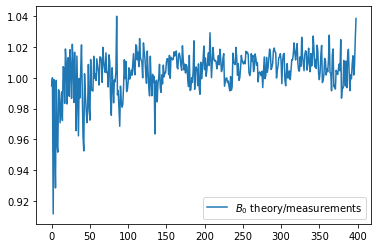

In [3]:
import matplotlib.pyplot as plt
plt.plot(bk0/mean[:399],label=r'$B_0$ theory/measurements')
plt.legend()

In [4]:
#compute redshift-space power spectrum
P0 = P024(P_template,np.array(P_template[:,0]),cosm_par,0)[:-2]
P2 = P024(P_template,np.array(P_template[:,0]),cosm_par,2)[:-2]
kp = np.array(P_template)[:-2,0]

#compute Poisson shot-noise given the volume and density
psn = (1000./512.)**3
#Apply the shot-noise correction with the A_P parameter
A_P = cosm_par[6]/(cosm_par[2]*cosm_par[3]*cosm_par[3])
P0 += (A_P-1)*psn

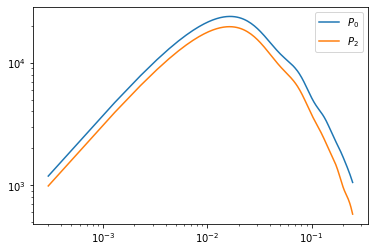

In [5]:
import matplotlib.pyplot as plt
plt.plot(kp,P0,label=r'$P_0$')
plt.plot(kp,P2,label=r'$P_2$')
plt.yscale('log')
plt.xscale('log')
plt.legend()